In [48]:
import pandas as pd
import numpy as np

In [49]:
dir = r"tidy_dataset.csv"
data = pd.read_csv(dir)
data.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'idle_men', 'no_of_style_change', 'actual_productivity'],
      dtype='object')

Removemos nuestros outliers para la columna "targeted_productivity"

In [50]:
Q1 = data.targeted_productivity.quantile(0.25)
Q3 = data.targeted_productivity.quantile(0.75)
Q1, Q3

(0.7, 0.8)

In [51]:
IQR = Q3 - Q1
round(IQR, 4)

0.1

In [52]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
round(lower_limit, 4), round(upper_limit, 4)

(0.55, 0.95)

In [53]:
data[(data.targeted_productivity<lower_limit)|(data.targeted_productivity>upper_limit)]

,quarter,department,day,team,targeted_productivity,smv,idle_men,no_of_style_change,actual_productivity
146,Quarter2,sweing,Thursday,11,0.35,12.52,0,0,0.349951
165,Quarter2,sweing,Saturday,11,0.50,12.52,0,0,0.673245
168,Quarter2,sweing,Saturday,5,0.50,20.79,0,0,0.388008
169,Quarter2,finishing,Saturday,5,0.50,4.15,0,0,0.337973
187,Quarter2,finishing,Sunday,5,0.50,4.15,0,0,0.609138
...,...,...,...,...,...,...,...,...,...
1104,Quarter1,sweing,Saturday,6,0.50,23.41,0,1,0.500528
1112,Quarter2,finishing,Sunday,5,0.50,3.94,0,0,0.857917
1124,Quarter2,sweing,Sunday,5,0.50,26.82,0,1,0.500034
1147,Quarter2,sweing,Monday,7,0.50,30.48,0,1,0.500611


In [54]:
data2 = data[(data.targeted_productivity>lower_limit)&(data.targeted_productivity<upper_limit)]
data2.shape

(1118, 9)

Encoding and Scaling

In [55]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
data_encoded = encoder.fit_transform(data2.iloc[:, 0:4])
feature_names = encoder.get_feature_names_out()
data_encoded = pd.DataFrame(data_encoded, columns=feature_names)
data_encoded

,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1114,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1115,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1116,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [56]:
data_scaled = data2.copy(deep=True)
data_scaled = data_scaled.reset_index()
for column in range(len(data_scaled.columns)):
    if column > 5 and column < 9:
        data_scaled.iloc[:, column] = preprocessing.MinMaxScaler().fit_transform( #StandardScaler
            data_scaled.iloc[:, column].values.reshape(-1,1))
data_scaled.iloc[:,5:]

,targeted_productivity,smv,idle_men,no_of_style_change,actual_productivity
0,0.80,0.450252,0.0,0.0,0.940725
1,0.75,0.020132,0.0,0.0,0.886500
2,0.80,0.164731,0.0,0.0,0.800570
3,0.80,0.164731,0.0,0.0,0.800570
4,0.80,0.445219,0.0,0.0,0.800382
...,...,...,...,...,...
1113,0.75,0.000000,0.0,0.0,0.628333
1114,0.70,0.019357,0.0,0.0,0.625625
1115,0.65,0.019357,0.0,0.0,0.625625
1116,0.75,0.000000,0.0,0.0,0.505889


In [57]:
dataset = pd.concat([data_encoded, data_scaled.iloc[:, 4:10]], axis=1)
dataset

,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,...,team_9,team_10,team_11,team_12,team,targeted_productivity,smv,idle_men,no_of_style_change,actual_productivity
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8,0.80,0.450252,0.0,0.0,0.940725
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0.75,0.020132,0.0,0.0,0.886500
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,11,0.80,0.164731,0.0,0.0,0.800570
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,12,0.80,0.164731,0.0,0.0,0.800570
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6,0.80,0.445219,0.0,0.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,10,0.75,0.000000,0.0,0.0,0.628333
1114,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8,0.70,0.019357,0.0,0.0,0.625625
1115,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7,0.65,0.019357,0.0,0.0,0.625625
1116,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,9,0.75,0.000000,0.0,0.0,0.505889


In [58]:
dataset.to_csv('Encoded_data.csv', index=False)

In [59]:
dir = r"D:\Fernando\Escritorio\Encoded_data.csv"
data = pd.read_csv(dir)
data.head()

,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,...,team_9,team_10,team_11,team_12,team,targeted_productivity,smv,idle_men,no_of_style_change,actual_productivity
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8,0.80,0.450252,0.0,0.0,0.940725
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0.75,0.020132,0.0,0.0,0.886500
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,11,0.80,0.164731,0.0,0.0,0.800570
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,12,0.80,0.164731,0.0,0.0,0.800570
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6,0.80,0.445219,0.0,0.0,0.800382


In [60]:
X_multiple = data.iloc[:, 0:30].round(2)
Y_multiple = data.iloc[:, 30].round(2)

In [61]:
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, Y_multiple, test_size=0.2)

In [62]:
#Definimos el algoritmo a utilizar
from sklearn import linear_model
lr_multiple = linear_model.LinearRegression()

In [63]:
#Entrenamos el modelo
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [64]:
#Realizamos una predicción
Y_pred_multiple = lr_multiple.predict(X_test)

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [81]:
pred_linreg = lr_multiple.predict(X_test)
print("MAE  :", mean_absolute_error(y_test, pred_linreg))
print("MSE  :", mean_squared_error(y_test, pred_linreg))
print("RMSE :",sqrt(mean_squared_error(y_test, pred_linreg)))
print("R2_SCORE :",r2_score(y_test, pred_linreg))

MAE  : 0.09965262276785714
MSE  : 0.020326048851013183
RMSE : 0.1425694527274801
R2_SCORE : 0.20572061688478893


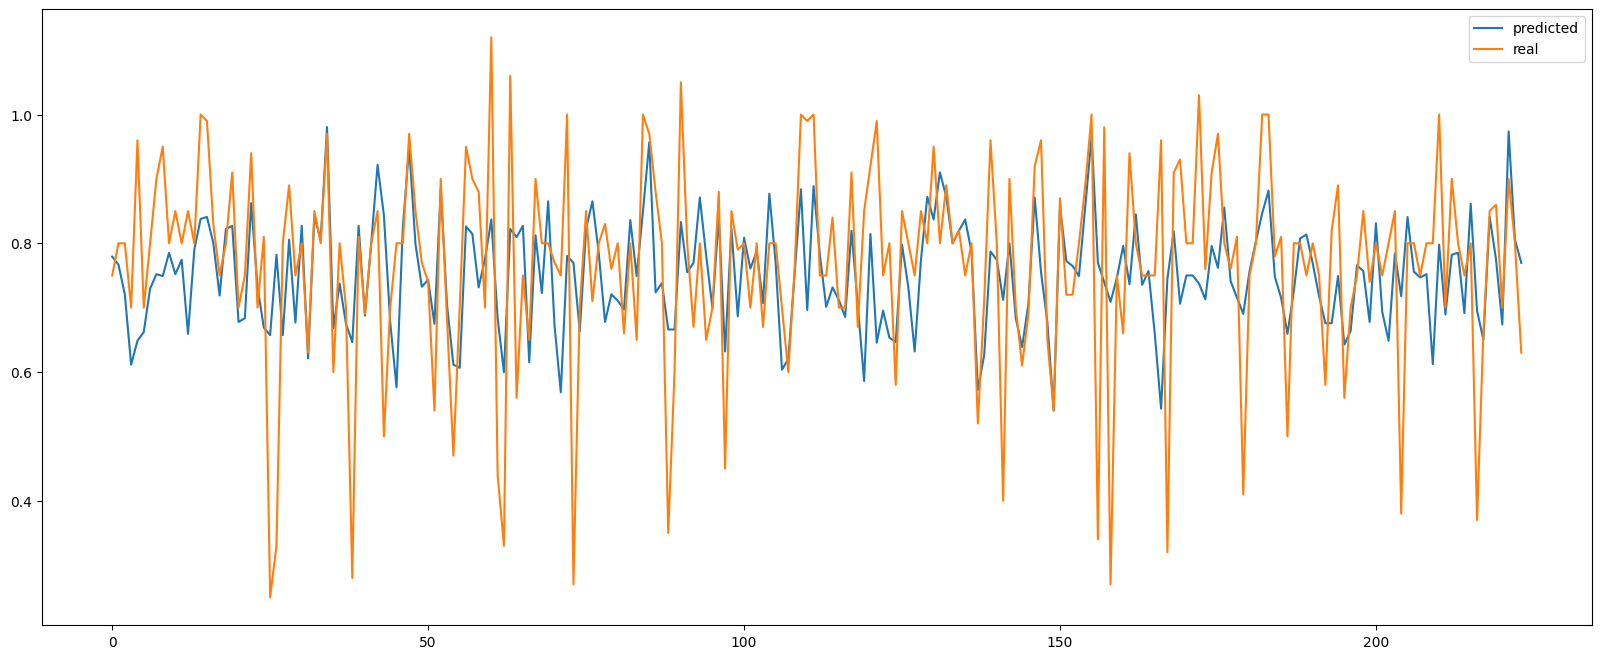

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
b = np.arange(0, len(Y_pred_multiple), 1)
plt.plot(b, Y_pred_multiple, label='predicted')
plt.plot(b, y_test, label='real')
plt.legend(loc=0)
plt.savefig('grafica.png')